# Suicide during the holiday season

Contrary to popular belief, the Christmas period in the USA typically sees relatively lower suicide rates compared to other times of the year. This challenges the misconception that the holiday season is associated with a significant rise in suicides. If there is indeed a seasonal effect on suicide rates, it would be necessary to examine data from countries in the Southern Hemisphere, such as Australia, where the seasons are reversed. This would help determine whether seasonal patterns (e.g., higher rates during summer months) are consistent across hemispheres.

Sources:
* USA suicide data (2018 – 2023): https://wisqars.cdc.gov/fatal-injury-trends/
* AUS suicide data (2019 – 2023): https://www.health.nsw.gov.au/mentalhealth/resources/Publications/sums-report-aug-2024.pdf

For the purpose of the advent calendar, I have paused this analysis as it has drifted from the core topic of Christmas. Additionally, I do not have sufficient data breaking down deaths by suicide on a monthly basis to present an accurate and reliable analysis.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
# Create a file path
data_path = '/Users/nataschajademinnitt/Documents/5. Data Analysis/christmas_advent/data/'
results_path = '/Users/nataschajademinnitt/Documents/5. Data Analysis/christmas_advent/results/'

### Data transformation: USA

In [432]:
# Load USA data
raw_usa = pd.read_csv(data_path + 'cdc_suicide.csv')

# Rename columns
raw_usa.rename(columns={'2023 (Provisional)': '2023'}, inplace=True)
raw_usa.drop(columns=['2024 (Provisional)'], inplace=True)

In [434]:
# Convert all year columns to integers
raw_usa.iloc[:, 0:6] = raw_usa.iloc[:, 0:6].astype(int)

# Calculate totals for numeric columns
total_row = raw_usa.iloc[:, 0:6].sum()  # Sum numeric columns
total_row['Month'] = 'Total'  # Add a label for the "Month" 

# Append the "Total" row to the DataFrame
raw_usa = pd.concat([raw_usa, pd.DataFrame([total_row])], ignore_index=True)

# Calculate monthly percentages for each year (excluding the "Total" row)
for year in ['2018', '2019', '2020', '2021', '2022', '2023']:
    raw_usa[year + '_%'] = ((raw_usa[year] / raw_usa.loc[raw_usa['Month'] == 'Total', year].values[0]) * 100).astype(int)

# reorder columns
column_order = ['Month',
                '2018', '2019', '2020', '2021', '2022', '2023',
               '2018_%', '2019_%', '2020_%', '2021_%', '2022_%', '2023_%',]

# Reorder the DataFrame columns
raw_usa = raw_usa[column_order]

# Drop the total row
raw_usa = raw_usa[raw_usa['Month'] != 'Total']

In [436]:
# New df just with the %
df_usa_per = raw_usa.copy()

df_usa_per.drop(columns=['2018', '2019', '2020', '2021', '2022', '2023'], inplace=True)

In [438]:
# Create an empty DataFrame with the specified columns
df_usa = pd.DataFrame(columns=['Year', 'Month', 'Percent (%)'])

df_usa = pd.melt(df_usa_per, id_vars=['Month'], var_name='Year', value_name='Percent (%)')

df_usa['Year'] = df_usa['Year'].str.replace("_%", "", regex=False)

### Data transformation: Aus

In [421]:
# Data for Aus
raw_aus = {
    "Month": [
        "January", "February", "March", "April", "May", "June", 
        "July", "August", "September", "October", "November", "December", "Total"
    ],
    "2020": [78, 65, 86, 57, 63, 67, 83, 85, 73, 63, 75, 88, 883],
    "2021": [100, 56, 85, 74, 77, 66, 72, 63, 64, 78, 71, 93, 899],
    "2022": [77, 72, 97, 92, 75, 65, 90, 72, 80, 73, 75, 72, 940],
    "2023": [88, 67, 86, 70, 87, 75, 92, 73, 77, 83, 68, 67, 933],
}

# Create the DataFrame
raw_aus = pd.DataFrame(raw_aus)

In [423]:
# Calculate monthly percentages for each year (excluding the "Total" row)
for year in ['2020', '2021', '2022', '2023']:
    raw_aus[year + '_%'] = ((raw_aus[year] / raw_aus.loc[raw_aus['Month'] == 'Total', year].values[0]) * 100).round(2)

# Drop the total row
raw_aus = raw_aus[raw_aus['Month'] != 'Total']

In [425]:
# New df just with the %
df_aus_per = raw_aus.copy()

df_aus_per.drop(columns=['2020', '2021', '2022', '2023'], inplace=True)

In [427]:
# Create an empty DataFrame with the specified columns
df_aus = pd.DataFrame(columns=['Year', 'Month', 'Percent (%)'])

df_aus = pd.melt(df_aus_per, id_vars=['Month'], var_name='Year', value_name='Percent (%)')

df_aus['Year'] = df_aus['Year'].str.replace("_%", "", regex=False)

## Visualisation

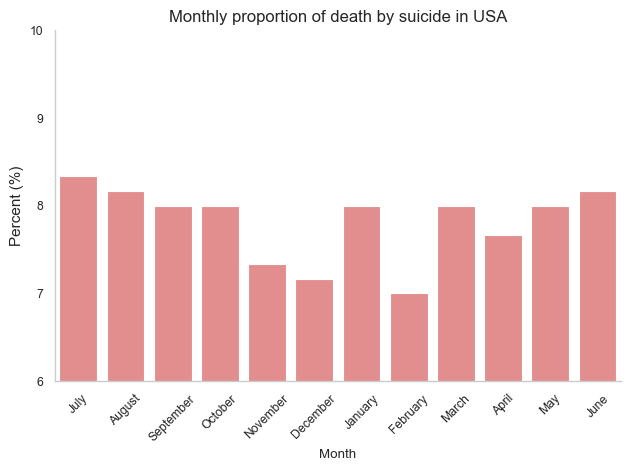

In [418]:
# Set the style for the plot
sns.set_style('whitegrid')
sns.set_context('paper')

order = ['July', 'August', 'September', 'October', 'November', 'December', 
         'January', 'February', 'March', 'April', 'May', 'June']

# Barplot with custom order
sns.barplot(data=df_usa, x='Month', y='Percent (%)', order=order, color='lightcoral', errorbar=None)

sns.despine(top=True, right=True)

# Customize the plot
plt.ylim(6, 9)
plt.yticks(range(6, 11, 1))
plt.xticks(rotation=45)
plt.title('Monthly proportion of death by suicide in USA', fontsize=12)
plt.ylabel('Percent (%)', fontsize=11)
plt.grid(axis='y', linestyle='')

# Show the plot
plt.tight_layout()
plt.show()

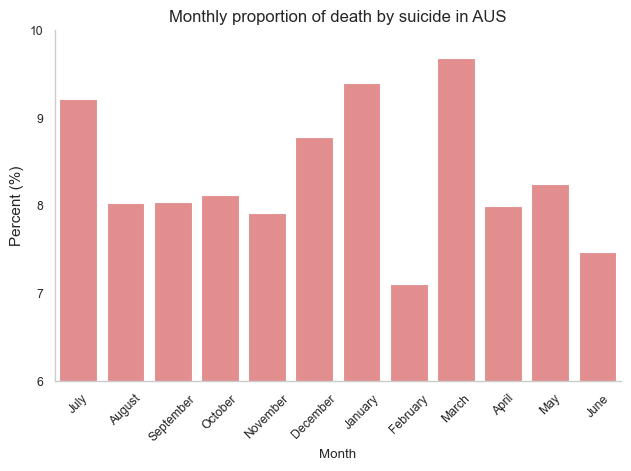

In [416]:
# Set the style for the plot
sns.set_style('whitegrid')
sns.set_context('paper')

order = ['July', 'August', 'September', 'October', 'November', 'December', 
         'January', 'February', 'March', 'April', 'May', 'June']

# Barplot with custom order
sns.barplot(data=df_aus, x='Month', y='Percent (%)', order=order, color='lightcoral', errorbar=None)

sns.despine(top=True, right=True)

# Customize the plot
plt.ylim(6, 9)
plt.yticks(range(6, 11, 1))
plt.xticks(rotation=45)
plt.title('Monthly proportion of death by suicide in AUS', fontsize=12)
plt.ylabel('Percent (%)', fontsize=11)
plt.grid(axis='y', linestyle='')

# Show the plot
plt.tight_layout()
plt.show()